# Pymaceuticals Inc.
---

### Analysis

In an effort to evaluate the effectiveness of various treatment regimens in fighting cancer, the pharmaceutical company Pymaceuticals Inc. conducted a detailed study using mice as test subjects. The experiment involved administering a series of drug treatments and documenting the evolution of tumor volume over time, along with collecting data on weight and number of metastatic sites. This crucial research provides valuable insights into which treatments may hold the most promise for future clinical studies and offers a deeper understanding of the relationship between test subjects weight and disease progression.

In the summary statistics section we can identify a data frame with a total of 9 regimens (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, Zoniferol and a Placebo). Analyzing the resultant data frame we can identify that the treatments with Capomulin and Ramicane are more effective in reducing tumor volume, with the lowest values in average and variability. This indicates high efficacy and consistency in response to treatment. The other regimens showed lower efficacy, evidenced by higher average tumor volumes and greater variability. Therefore, Capomulin and Ramicane could be considered as the most promising options for cancer treatments based on these preliminary results.

In the bar charts we can identify that capolumin and ramicane are the two drugs regimens with the most number of observed mice and the least observed is propriva.

In the pie charts we can identify that the distribution of female versus male mice is almost totally even (male: 51% and female: 49%), this means that we can have unbiased data allowing a balanced comparison of treatment effects between sexes.

Analizing the box plot we can see that it shows the distribution of the final tumor volume across the four treatment regimens. Capomulin and Ramicane have lower medians and narrower interquartile ranges compared to Infubinol and Ceftamin, indicating smaller tumor volumes and lower variability among treated mice. Infubinol shows a red dot outside the upper mustache, signaling an outlier that exceeds the expected typical variability. This suggests that although Infubinol may be effective in general, there could be cases where it is not as effective or has unexpected effects. These results could support the selection of Capomulin and Ramicane as more consistent and possibly more effective treatments in reducing tumor size.

Analizing the line plot we can be observe the Capomulin treatment of mouse l509, this shows that the tumor volume initially increased, then decreased significantly until day 35, and showed a slight increase towards the end of the study period. This indicates a positive response to treatment with Capomulin, with a general tendency for tumor size to shrink, albeit with some variability, as evidenced by the final increase.

The scatter plot shows the relationship between the weight of the mice and the average volume of their tumors under treatment with Capomulin. There is a visible trend suggesting that heavier mice tend to have larger tumors. This could indicate that the weight of the mouse is a factor influencing tumor size, although further analysis would be needed to establish clear causation. Considering the regression line and the correlation coefficient of 0.84 reinforce the statement, as the weight of the mouse increases the tumor volume tends to increase as well.

Conclusions

Treatment Effectiveness: The Capomulin and Ramicane regimens stood out as having the lowest average tumor volumes among all treatments examined, suggesting greater effectiveness in reducing tumor size compared against other treatment regimens like Infubinol and Ceftamin. Specifically, Ramicane had the lowest average tumor volume, followed close by Capomulin. 

Monitoring and Observations: Capomulin and Ramicane also had the highest number of time points observed per mouse, which could indicate more frequent follow-up and possibly better treatment management, increasing the perceived effectiveness of these drugs. 

Gender Distribution and Potential Biases: The distribution of genders in test subjects was nearly even, reducing the potential for gender bias in treatment outcomes and increasing the generalizability of findings to broader populations.

Relationship Between Tumor Weight and Volume: A significant positive correlation was found between the weight of mice and the average tumor volume in the Capomulin regimen, with a correlation coefficient of 0.84. This indicates that as the weight of the mouse increases, so does the volume of the tumor, which may be a factor to consider in the planning of treatment and in the evaluation of its effectiveness.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df=pd.merge(mouse_metadata,study_results)

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_df=combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice_df['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=combined_data_df[combined_data_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data_df['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen = clean_data_df.groupby('Drug Regimen')

summary_stats ={
    'Mean Tumor Volume': [],
    'Median Tumor Volume': [],
    'Tumor Volume Variance': [],
    'Tumor Volume Std. Dev.': [],
    'Tumor Volume Std. Err.': []}

for drug, subset in grouped_regimen:
    summary_stats['Mean Tumor Volume'].append(subset['Tumor Volume (mm3)'].mean())
    summary_stats['Median Tumor Volume'].append(subset['Tumor Volume (mm3)'].median())
    summary_stats['Tumor Volume Variance'].append(subset['Tumor Volume (mm3)'].var())
    summary_stats['Tumor Volume Std. Dev.'].append(subset['Tumor Volume (mm3)'].std())
    summary_stats['Tumor Volume Std. Err.'].append(subset['Tumor Volume (mm3)'].sem())

regimen_summary_df = pd.DataFrame(summary_stats, index=grouped_regimen.groups.keys())
regimen_summary_df_sorted = regimen_summary_df.sort_index()

regimen_summary_df_sorted

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary_advanced = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem').reset_index()

regimen_summary_advanced

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

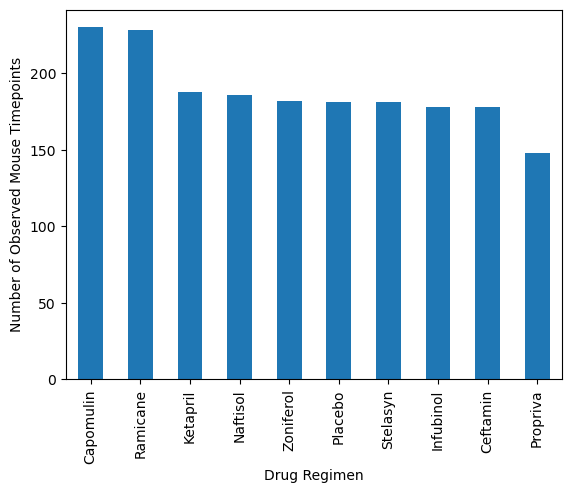

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart= clean_data_df["Drug Regimen"].value_counts().plot.bar()
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Observed Mouse Timepoints")


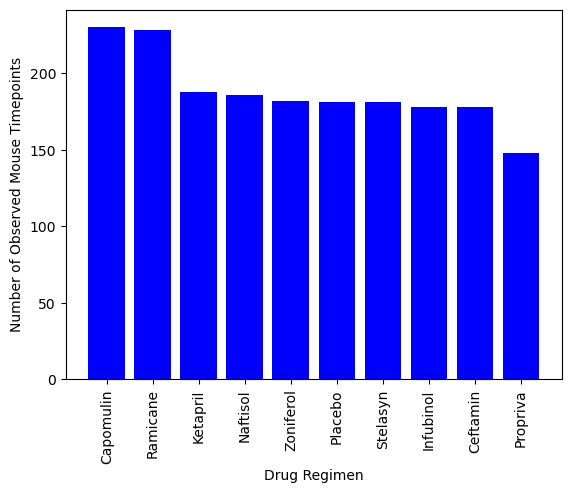

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data_df['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.xticks(rotation=90)


plt.show()

Text(0, 0.5, 'Sex')

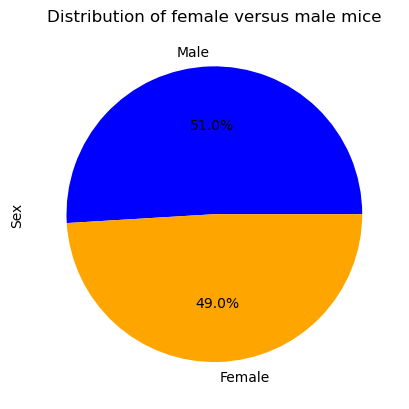

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex= clean_data_df["Sex"].value_counts()
pie_chart=mice_sex.plot.pie(colors=["blue","orange"], autopct="%1.1f%%", title="Distribution of female versus male mice")
pie_chart.set_ylabel("Sex")


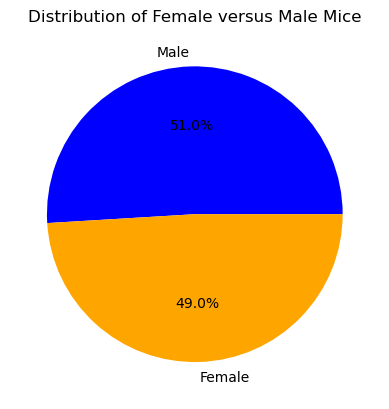

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_distribution = clean_data_df['Sex'].value_counts()

plt.pie(mice_sex_distribution, labels=mice_sex_distribution.index, autopct='%1.1f%%', colors=['blue','orange'], startangle=360)
plt.title('Distribution of Female versus Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    quartiles = final_volume_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    # Determine outliers using upper and lower bounds
    outliers = final_volume_data[(final_volume_data < lower_bound) | (final_volume_data > upper_bound)]
    tumor_vol_data.append(final_volume_data)

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


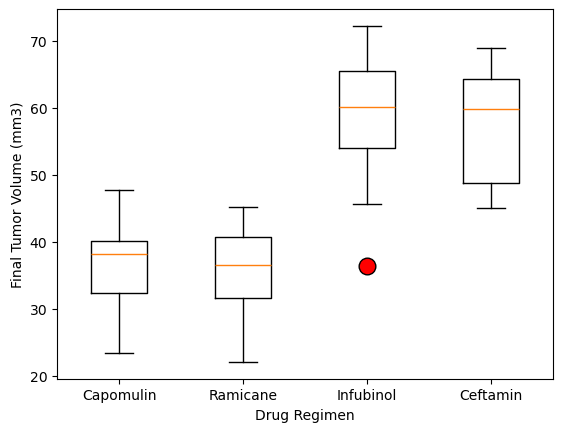

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

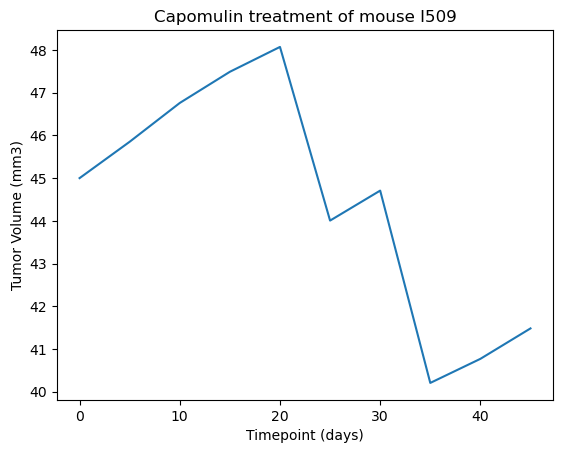

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_data_df[(clean_data_df['Drug Regimen'] == 'Capomulin') & (clean_data_df['Mouse ID'] == 'l509')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

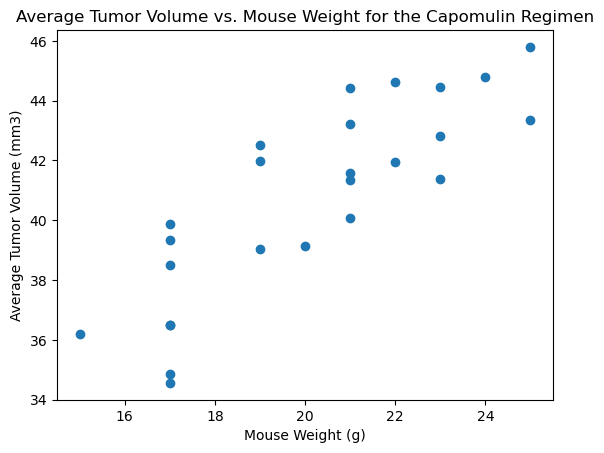

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

average_tumor_vol = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean().reset_index()

unique_weights = clean_data_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_df = pd.merge(average_tumor_vol, unique_weights, on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


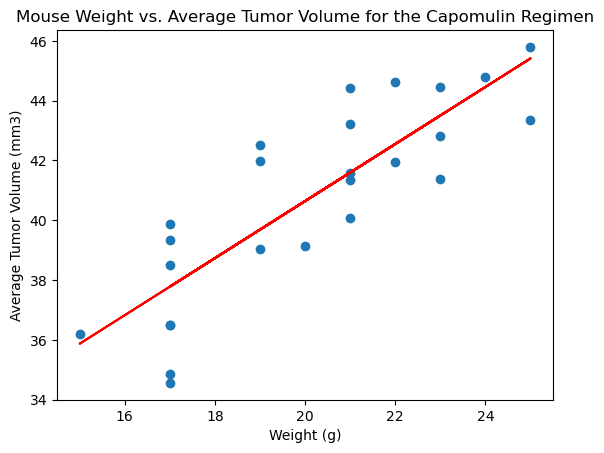

In [62]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_df = pd.merge(avg_tumor_vol, capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

x_values = merged_df['Weight (g)']
y_values = merged_df['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between mouse weight and average tumor volume is {correlation[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')

plt.show()
